In [1]:
pip install diffusers transformers accelerate torch pillow


In [ ]:
from huggingface_hub import login

login(token="")


In [3]:
from huggingface_hub import whoami
print(whoami())


{'type': 'user', 'id': '69687921c278517071468c1d', 'name': 'peehuvjhvj', 'fullname': 'Peehu Mishra', 'email': 'mpeehu3@gmail.com', 'emailVerified': True, 'canPay': False, 'billingMode': 'prepaid', 'periodEnd': 1769904000, 'isPro': False, 'avatarUrl': '/avatars/7bb2d2a987921d0348fdbc9a11f6d11b.svg', 'orgs': [], 'auth': {'type': 'access_token', 'accessToken': {'displayName': 'gai', 'role': 'read', 'createdAt': '2026-01-15T05:40:23.629Z'}}}


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


In [4]:
from transformers import pipeline
import os

generator = pipeline("text-generation", model="gpt2")


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0


In [5]:
prompts = [
    "A futuristic city with glowing buildings",
    "A robot studying in a classroom",
    "A peaceful village at sunrise",
    "A smart hospital powered by AI",
    "A cyberpunk street at night"
]


In [6]:
output_dir = "synthetic_text_dataset"
os.makedirs(output_dir, exist_ok=True)

for i, prompt in enumerate(prompts):
    output = generator(prompt, max_length=120, num_return_sequences=1)

    with open(f"{output_dir}/text_{i+1}.txt", "w") as f:
        f.write(output[0]["generated_text"])

    print(f"Saved text_{i+1}.txt")


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/

Saved text_1.txt


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved text_2.txt


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved text_3.txt


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=120) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


Saved text_4.txt
Saved text_5.txt


In [7]:
with open("synthetic_text_dataset/text_1.txt", "r") as f:
    print(f.read())


A futuristic city with glowing buildings and skyscrapers. It's also home to the most expensive train in the world.

And like any futuristic city, it can't be done without the help of some of the world's most influential people.

Travellers may have heard about the $1.3 billion Metro system that is coming to New York in the coming years. That's because Metro is now scheduled to open its first station in the Bronx in 2017.

But the city's subway system is not only one of the world's most expensive, but also one of the most expensive.

The system will run for 10 years from now, and will consist of only four stations. It also carries trains to and from each station.

According to estimates from the U.S. Department of Transportation, the system will cost $23 billion in the first decade.

"It's not just about getting new trains. It's about trying to find new ways to get better service," said Mike T. Wright, president of the Central New York Partnership for Transit, which operates the system.

# Images


In [ ]:
!pip install -q diffusers transformers accelerate safetensors torch pillow


In [ ]:
import torch
from diffusers import StableDiffusionPipeline
import os
from PIL import Image
import matplotlib.pyplot as plt

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


In [ ]:
prompts = [
    "A futuristic city with neon lights at night",
    "A humanoid robot working in a hospital",
    "A peaceful mountain village at sunrise",
    "A cyberpunk street with flying cars",
    "An AI-powered classroom of the future"
]


In [ ]:
output_dir = "synthetic_image_dataset"
os.makedirs(output_dir, exist_ok=True)

for i, prompt in enumerate(prompts):
    image = pipe(
        prompt,
        height=512,
        width=512,
        num_inference_steps=25
    ).images[0]

    image.save(f"{output_dir}/image_{i+1}.png")
    print(f"Saved image_{i+1}.png")


  0%|          | 0/25 [00:00<?, ?it/s]

Saved image_1.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved image_2.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved image_3.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved image_4.png


  0%|          | 0/25 [00:00<?, ?it/s]

Saved image_5.png


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

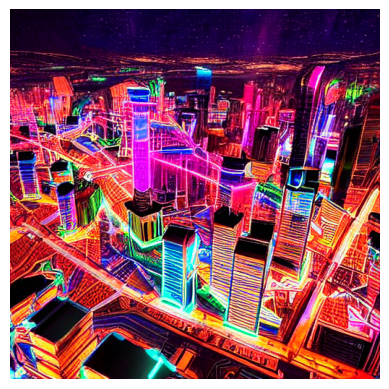

In [ ]:
img = Image.open("synthetic_image_dataset/image_1.png")
plt.imshow(img)
plt.axis("off")


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

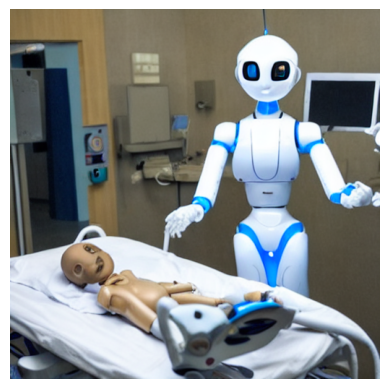

In [ ]:
img = Image.open("synthetic_image_dataset/image_2.png")
plt.imshow(img)
plt.axis("off")